In [11]:
# wav 파일을 읽을 때 사용하는 대표적인 라이브러리는 librosa와 wavfile이 있음.

import librosa
import librosa.display

from scipy.io import wavfile
import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wav_file = 'blues.00000.wav'

## 라이브러리 wavfile과 librosa 차이 확인
- wavfile : 정수
- librosa : 실수, [-1,1]의 범위로 정규화 되어있음, 하이퍼라미터 sr=None일 경우 고유의 헤르츠 사용. 'sr=18000' 처럼 sampling_rate를 지정하면 18000kHz로 리샘플링할 수 있음.(=1초당 18000개의 데이터를 샘플링)

- 리브로사 라이브러리를 많이 사용.

In [9]:
scipy_sr, scipy_wav = wavfile.read(wav_file) #샘플링 데이터, 웨이브 데이터 정보
librosa_wav, librosa_sr = librosa.load(wav_file, sr=None)

#scipy
print('scipy_wav.shape :', scipy_wav.shape)
print('scipy_wav[0].type :', type(scipy_wav[0]))
print('scipy_sr :', scipy_sr)

print()
print()

#Librosa
print('librosa_wav.shape :', librosa_wav.shape)
print('librosa_wav[0].type :', type(librosa_wav[0]))
print('librosa_sr :', librosa_sr)

scipy_wav.shape : (661794,)
scipy_wav[0].type : <class 'numpy.int16'>
scipy_sr : 22050


librosa_wav.shape : (661794,)
librosa_wav[0].type : <class 'numpy.float32'>
librosa_sr : 22050


22.05kHz로 약 60만개의 샘플링이 있음.

## 전체 데이터 확인

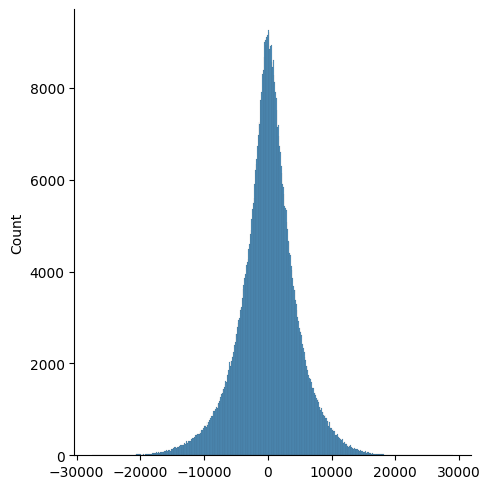

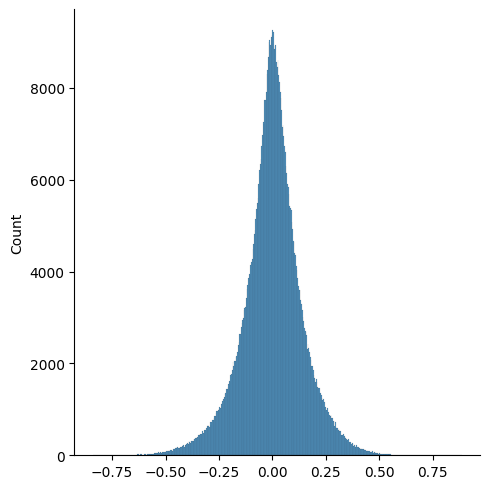

In [14]:
sns.displot(scipy_wav)
sns.displot(librosa_wav)

In [19]:
# sr=16000 : 1초당 16000개의 데이터를 샘플링함.
y, sr = librosa.load(wav_file, sr=16000) # y : 파형의 amplitude 값, sr : 초당 샘플 갯수

print('sr:', sr, ', audio shape:', y.shape)
print('length', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (480214,)
length 30.013375 secs


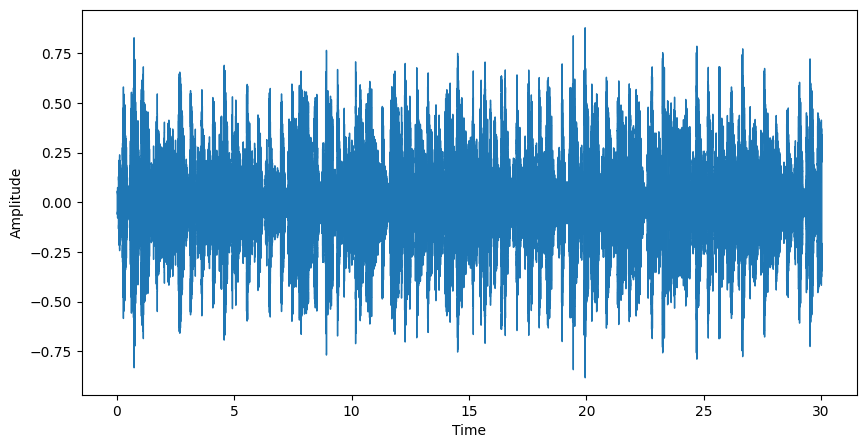

In [18]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

Text(0.5, 1.0, 'Power spectrum')

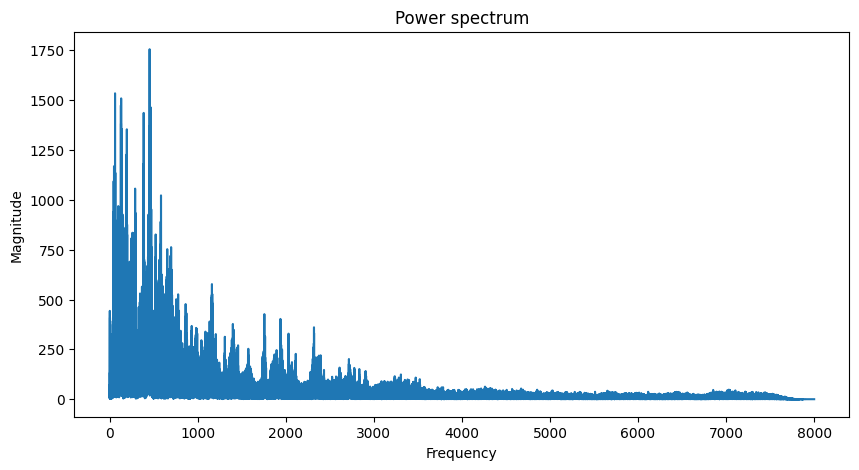

In [21]:
fft = np.fft.fft(y)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

*블루스 파일 특징
- 8000Hz 까지 분포함.
- 그래프의 앞 쪽이 높은 것을 보면, 1-1000Hz (저주파) 쪽이 많이 분포되어 있는 것을 알 수 있음.

## STFT (Short-Time Fourier Transform)
- 프레임 : 2048개씩
- shifting(이동) : 512개씩


In [23]:
#일반적으로 n_fft의 1/4 가 겹치도록 설정한다고 한다.

n_fft = 2048
hop_length = 512

stft = librosa.stft(y, n_fft = n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
print('Spectrogram :\n', spectrogram)

Spectrogram :
 [[2.1846931e+00 2.6769881e+00 2.8254831e+00 ... 1.1400276e+00
  2.4472187e+00 3.7231765e+00]
 [1.7788764e+00 1.1168728e+00 1.4491980e+00 ... 1.4028586e+00
  2.1982551e+00 6.4668908e+00]
 [1.2812016e+00 6.3511252e-01 2.9990685e-01 ... 2.9798877e-01
  6.3271892e-01 6.1790581e+00]
 ...
 [3.8926189e-03 1.9241038e-03 2.7207537e-07 ... 2.3432465e-06
  2.1725376e-04 2.8988283e-02]
 [3.8903789e-03 1.9234727e-03 1.6558241e-06 ... 1.7546070e-06
  2.1646952e-04 2.8981509e-02]
 [3.8905968e-03 1.9229037e-03 1.4402054e-06 ... 2.4901767e-06
  2.1931356e-04 2.8981190e-02]]


## Spectrogram

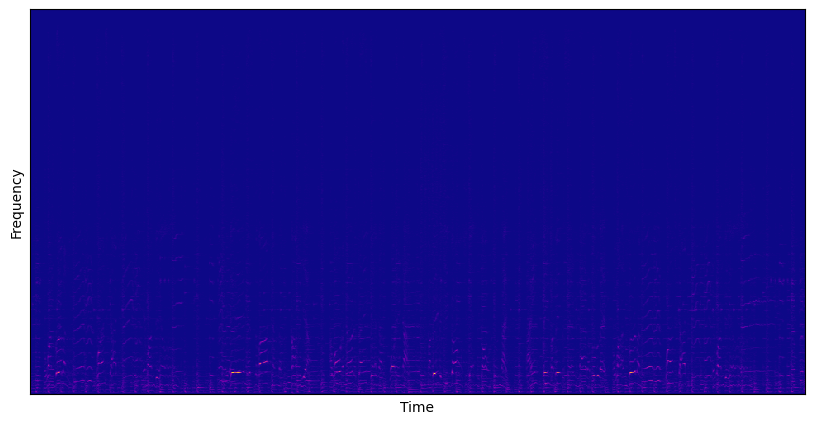

In [24]:
#주파수의 정도를 색깔로 확인할 수 있다.

plt.figure(figsize =(10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

- 밝은 곳은 음성 에너지가 높은 곳
- 저주파가 주로 많음을 알 수 있음

## Log-spectrogram
로그 스케일링 변환

Text(0.5, 1.0, 'Spectrogram (dB)')

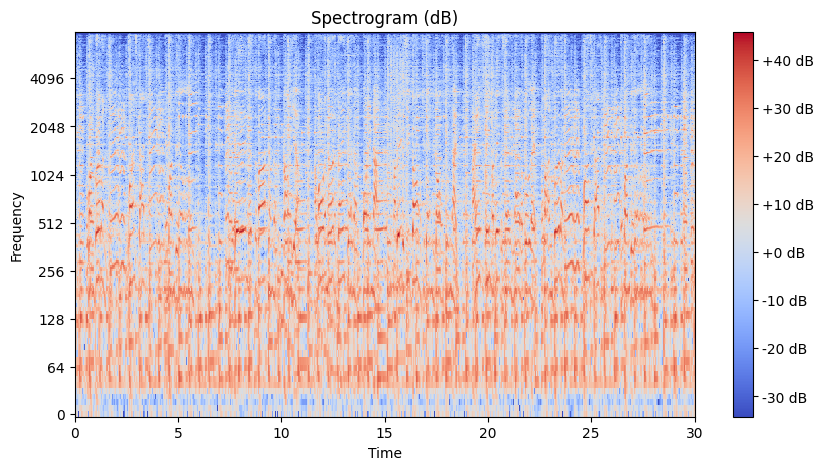

In [27]:
# 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectrogram을 나타내는 것이 분석에 용이함.
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

1024Hz 이하의 낮은 주파수 대역에 위치함을 알 수 있음

## MFCC (Mel Frequency Cepstral Coefficient)
- MFCC : 오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값(사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지는 고유한 특징을 추출한 값)
- librosa.feature.mfcc(audiao, ar, n_mfcc, n_fft, hop_length)
- sr : defalt값dms 22050Hz지만 앞서 음성 데이터를 load할 때 sr을 16000Hz로 했기 때문에 꼭 다시 지정해줘야 함.(사람의 목소리는 대부분 16000Hz 안에 포함되기 때문에 이로 지정)
- n_mfcc : return 될 mfcc의 개수를 정해주는 파라미터. default=20
- n_fft : win_length보다 길 경우 모두 zero padding 해서 처리하기 위한 파라미터. default=win_length
- hop_legnth : 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터. 16000Hz인 음성은 160에 해당(16000 * 0.01 = 160)

In [31]:
mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) #n_mfcc : coefficient 차수 20개.(대개 20차수 많이 사용함)

print("MFCC Shape:", mfcc.shape)
print("MFCC: \n", mfcc )

MFCC Shape: (20, 938)
MFCC: 
 [[-2.19682114e+02 -1.78939407e+02 -1.48019211e+02 ... -5.33470802e+01
  -6.35460205e+01 -5.01278496e+01]
 [ 7.94789658e+01  8.06500092e+01  8.18195648e+01 ...  1.08733307e+02
   1.14506744e+02  1.05405106e+02]
 [ 7.00949621e+00  1.63545742e+01  1.49747639e+01 ... -4.57788124e+01
  -3.49128952e+01 -1.00394096e+01]
 ...
 [ 7.05525970e+00  5.79713726e+00  3.27102160e+00 ... -7.53669930e+00
  -6.75994015e+00  1.81915462e+00]
 [-2.84073329e+00 -5.89227867e+00 -1.70086682e+00 ... -4.65869284e+00
  -4.47075987e+00  1.88751400e+00]
 [ 5.82855034e+00  3.85715032e+00  4.01251698e+00 ...  2.64046907e+00
  -7.20429420e-02 -4.39655691e-01]]


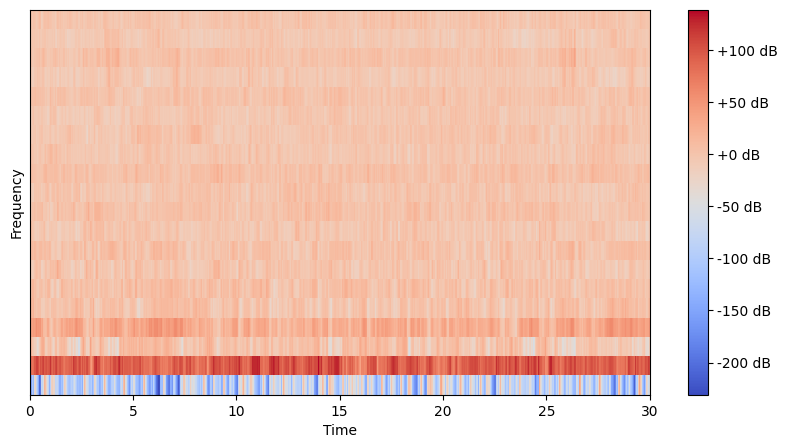

In [32]:
plt.figure(figsize=(10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

## 다른 음악 파일로 실습 해보기
브루스 vs 힙합

librosa_wav.shape : (661504,)
librosa_wav[0].type : <class 'numpy.float32'>
librosa_sr : 22050


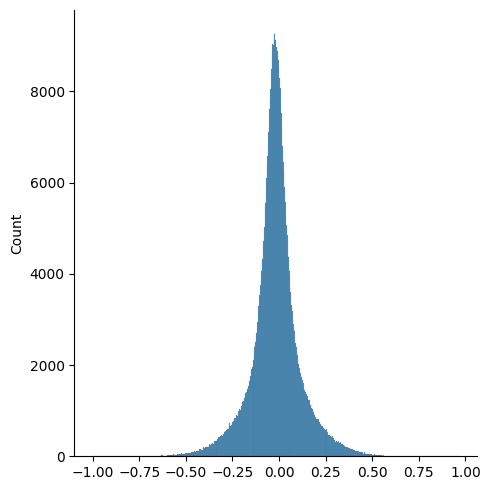

In [36]:
wav_file = 'hiphop.00000.wav'

librosa_wav, librosa_sr = librosa.load(wav_file, sr=None)

#Librosa
print('librosa_wav.shape :', librosa_wav.shape)
print('librosa_wav[0].type :', type(librosa_wav[0]))
print('librosa_sr :', librosa_sr)

sns.displot(librosa_wav)

In [37]:
# sr=16000 : 1초당 16000개의 데이터를 샘플링함.
y, sr = librosa.load(wav_file, sr=16000) # y : 파형의 amplitude 값, sr : 초당 샘플 갯수

print('sr:', sr, ', audio shape:', y.shape)
print('length', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (480003,)
length 30.0001875 secs


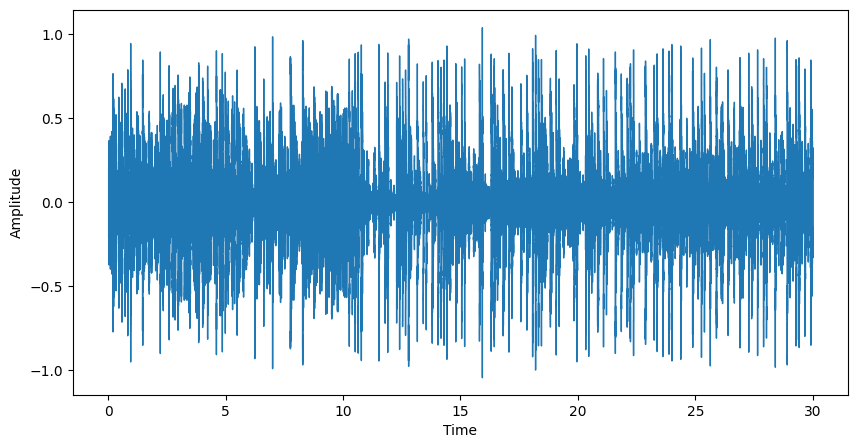

In [38]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

Text(0.5, 1.0, 'Power spectrum')

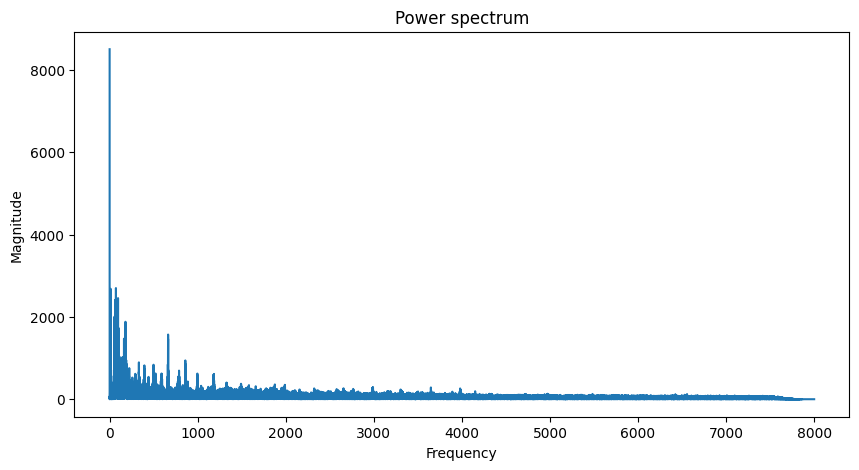

In [39]:
fft = np.fft.fft(y)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [40]:
#일반적으로 n_fft의 1/4 가 겹치도록 설정한다고 한다.

n_fft = 2048
hop_length = 512

stft = librosa.stft(y, n_fft = n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
print('Spectrogram :\n', spectrogram)

Spectrogram :
 [[1.44927816e+01 1.84736843e+01 1.31703167e+01 ... 1.89747238e+01
  2.71665573e+00 1.11913099e+01]
 [1.23937025e+01 1.42284069e+01 1.35514259e+00 ... 2.24012966e+01
  1.21502714e+01 1.76807194e+01]
 [7.80234003e+00 6.69332600e+00 6.58336163e+00 ... 1.46793766e+01
  1.73225498e+01 1.94984493e+01]
 ...
 [2.15670876e-02 1.03118196e-02 2.00839645e-06 ... 5.81899440e-06
  1.41895434e-03 9.00180452e-03]
 [2.15382278e-02 1.02863777e-02 9.91651632e-07 ... 1.41228666e-05
  1.41626771e-03 8.98983423e-03]
 [2.15084460e-02 1.02768326e-02 2.14539909e-06 ... 7.84029999e-06
  1.42199208e-03 8.99253041e-03]]


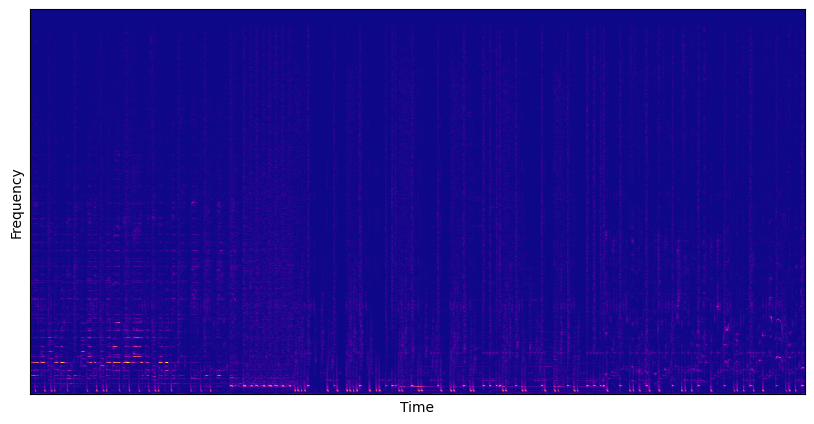

In [41]:
#주파수의 정도를 색깔로 확인할 수 있다.

plt.figure(figsize =(10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

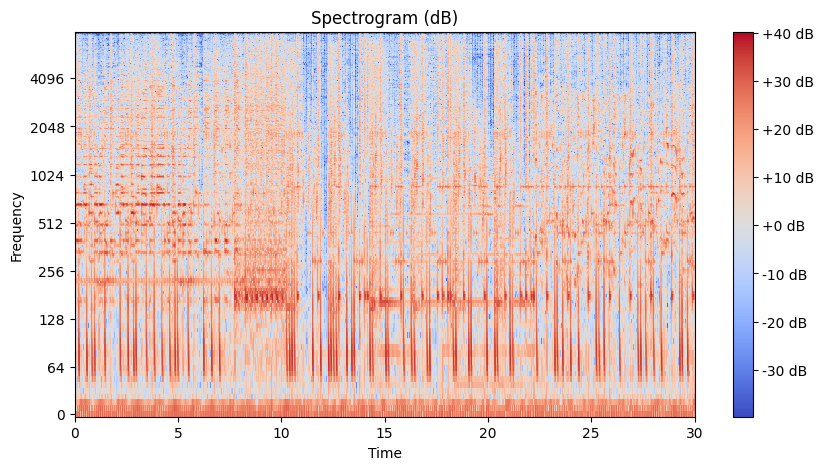

In [42]:
# 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectrogram을 나타내는 것이 분석에 용이함.
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [43]:
mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) #n_mfcc : coefficient 차수 20개.(대개 20차수 많이 사용함)

print("MFCC Shape:", mfcc.shape)
print("MFCC: \n", mfcc )

MFCC Shape: (20, 938)
MFCC: 
 [[-57.662106  -28.028498  -28.92109   ...  62.753407   23.817455
  -20.601648 ]
 [ 27.929964   27.179604   38.566154  ...  29.401989   25.619438
   33.796944 ]
 [-11.1339855 -13.993746  -15.346052  ...  -4.885591  -16.299707
  -12.946481 ]
 ...
 [  7.1130567   6.1203203   1.640866  ...  -6.303179   -9.572884
  -16.377363 ]
 [ -4.385828   -5.9305906  -5.891907  ...  -7.472849  -10.423981
  -11.503467 ]
 [ 10.923025    5.7576838   2.2993922 ...   3.1131942  -1.1341572
   -1.412339 ]]


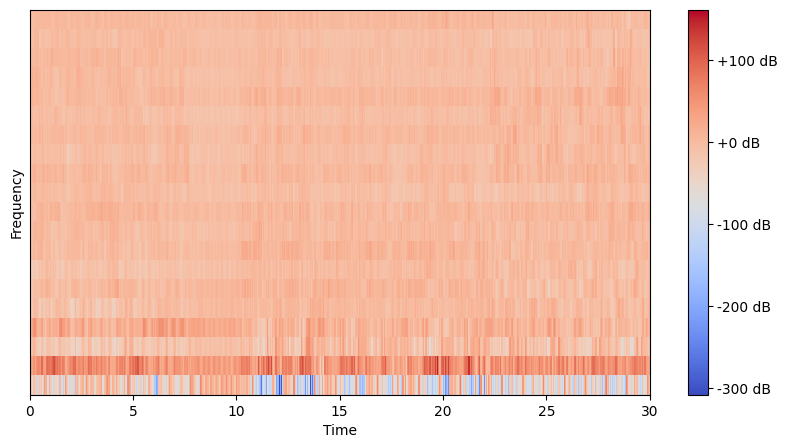

In [44]:
plt.figure(figsize=(10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()